<a href="https://colab.research.google.com/github/Sambhavjain9812/MNIST-Digit-classification-using-Neural-Network/blob/main/MNIST_Digit_classification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**

Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [5]:
# printing the 10th image

print(X_train[10])

# see closely its a number 3

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


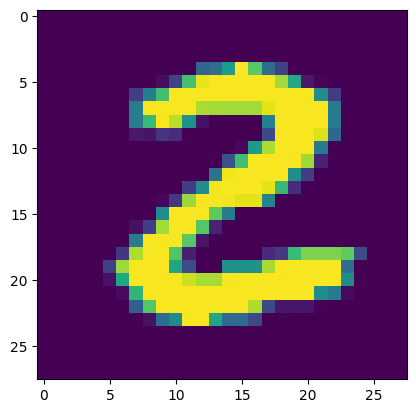

In [8]:
# displaying the image

plt.imshow(X_train[25])
plt.show()



In [11]:
# print the corresponding label
print(Y_train[25])

2


Image Lables

In [12]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [13]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [14]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [15]:
# printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [16]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid') #there are only 10 classses only so the neuron is 10 only no change here
])

In [17]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


When examining a model for signs of overfitting, it's important to look at certain metrics that can help you identify this issue. Some of the key metrics to consider for assessing overfitting are:

Training Loss and Validation Loss: Plot the training and validation loss over the epochs. If the training loss continues to decrease while the validation loss starts to increase or remains stagnant, it suggests that the model is starting to overfit the training data.

Training Accuracy and Validation Accuracy: Similarly, observe the training and validation accuracy over the epochs. A significant gap between the training accuracy and the validation accuracy might indicate overfitting.

In [18]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.3020 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1423 - accuracy: 0.9578
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1038 - accuracy: 0.9685
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0844 - accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0686 - accuracy: 0.9789
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0609 - accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0529 - accuracy: 0.9832
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0466 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0401 - accuracy: 0.9876
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.03

Training data accuracy = 98.9%

**Accuracy on Test data:**

In [19]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1118 - accuracy: 0.9690
0.968999981880188


Test data accuracy = 97%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


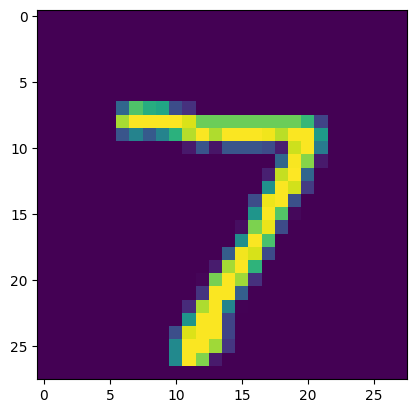

In [20]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [21]:
print(Y_test[0])

7


In [22]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [23]:
print(Y_pred.shape)

(10000, 10)


In [24]:
print(Y_pred[0])

[7.2808987e-05 2.7798328e-01 1.9848025e-01 9.8048925e-01 4.6212276e-07
 3.3272598e-03 9.3669272e-10 9.9999952e-01 2.3976784e-02 3.7917858e-01]


model.predict() gives the prediction probability of each class for that data point

In [25]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [26]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 7, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

Confusin Matrix

In [27]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [28]:
print(conf_mat)

tf.Tensor(
[[ 969    1    1    1    1    1    4    1    1    0]
 [   2 1124    2    0    0    2    2    0    3    0]
 [   4    4  996    2    3    0    6   13    3    1]
 [   1    0    8  956    1   28    0    9    4    3]
 [   3    0    6    0  950    2    3    2    1   15]
 [   2    1    0    7    2  868    4    2    3    3]
 [   3    2    1    1    4    3  942    0    2    0]
 [   1    3   13    1    1    1    0  999    1    8]
 [   5    0   10    7    5   14    4    6  921    2]
 [   3    3    3    4   17    6    0    7    1  965]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

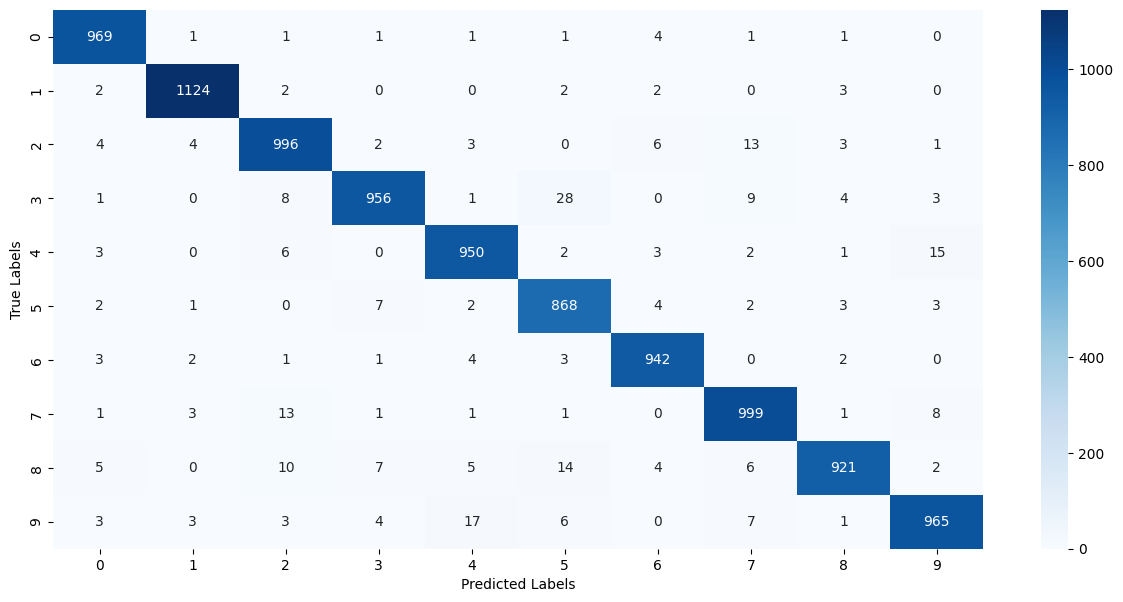

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [47]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [48]:
type(input_image)

numpy.ndarray

In [49]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


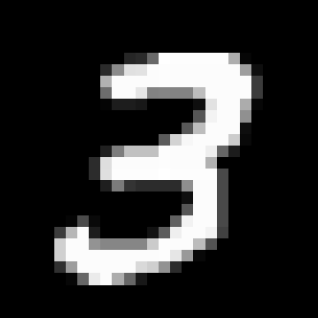

In [50]:
cv2_imshow(input_image)

In [51]:
input_image.shape

(318, 318, 3)

In [52]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY) #changing it into grayscal from RGB

In [53]:
grayscale.shape

(318, 318)

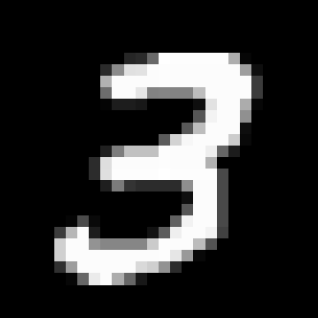

In [54]:
cv2_imshow(input_image)

In [55]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [56]:
input_image_resize.shape

(28, 28)

In [57]:
cv2_imshow(input_image_resize)

In [58]:
print(input_image_resize)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 131 133 13

In [59]:
input_image_resize = input_image_resize/255

In [60]:
type(input_image_resize)

numpy.ndarray

In [61]:
print(input_image_resize)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [63]:
image_reshaped = np.reshape(input_image_resize, [1,28,28]) #only 1 image is going to be predicted

In [64]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 31ms/step
[[2.71301454e-11 1.51653105e-04 3.85994688e-02 1.00000000e+00
  1.13180073e-11 7.77281681e-03 9.63261961e-16 1.22935295e-01
  7.67700195e-01 4.48244005e-01]]


In [65]:
input_pred_label = np.argmax(input_prediction)

In [66]:
print(input_pred_label)

3


**Predictive System**

Path of the image to be predicted: /content/MNIST_digit.png


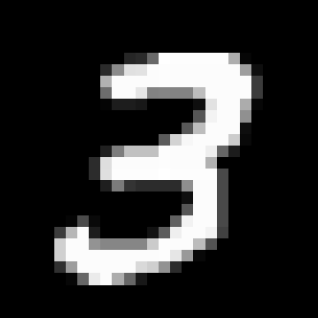

1/1 [==============================] - 0s 19ms/step
The Handwritten Digit is recognised as  3


In [68]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)